# Playing with parton densities
## Checking the sum rules

In [1]:
from ROOT import gRandom
from math import sqrt, log
import lhapdf

Welcome to JupyROOT 6.12/07


Import the pdf by name, try also "MRST2004nlo" or "MRST2007lomod" (LO)

In [2]:
name = "MRST2007lomod"	
pdf = lhapdf.getPDFSet(name).mkPDF(0)

LHAPDF 6.2.1 loading /lhapdf/install/share/LHAPDF/MRST2007lomod/MRST2007lomod_0000.dat
MRST2007lomod PDF set, member #0, version 2; LHAPDF ID = 20650


We will evaluate the sum rule at scale 10 GeV

In [3]:
Q = 10.0

Get the xmin and xmin from info in the PDF set

In [4]:
xmin, xmax = pdf.xMin, pdf.xMax

MC integration with importance sampling 1/x

In [5]:
npoints = 10000
sum0 = sum00 = 0
for n in range(npoints):
    # for importance sampling
    x = xmin * (xmax/xmin)**gRandom.Uniform()
    #  sum over all flavors for mom sum rule
    f=0
    for fl in range(-6, 7):
        f += pdf.xfxQ(fl, x, Q)

    ff = f*x*log(xmax/xmin)
    sum0  +=  ff
    sum00 +=  ff**2

Normalize to npoints and calculate the error

In [6]:
sum0  /= npoints
sum00 /= npoints
sigma2 = sum00 - sum0*sum0
error = sqrt(sigma2/npoints)

And finally result:

In [7]:
print " momentum sum rule is: ", sum0, "+/-", error

 momentum sum rule is:  1.11037212566 +/- 0.0116142870197


## Plot some PDFs for fun
Import what is needed

In [8]:
from ROOT import TGraph, TCanvas, kRed

Evaluate the gluon and up-quark pdf at the xPoints with logarithmic spacing

In [9]:
n = 100
xPoints = [10**(5*x/float(n)) for x in range(-n,0) ]
gPoints = [pdf.xfxQ(0, x, Q) for x in xPoints ] # 0 for gluon
uPoints = [pdf.xfxQ(2, x, Q) for x in xPoints ] # 2 for up-quark

Fill the TGraph object with the values of the lists above

In [10]:
grG,grU = TGraph(), TGraph()
for i in range(n):
    grG.SetPoint(i, xPoints[i], gPoints[i])
    grU.SetPoint(i, xPoints[i], uPoints[i])

Plotting

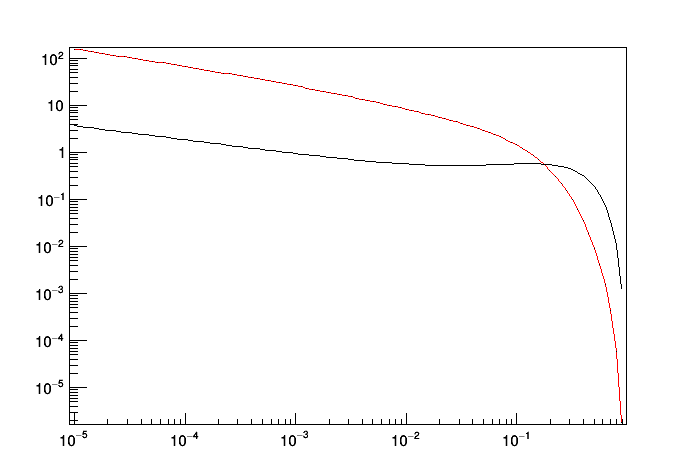

In [11]:
c = TCanvas()
c.SetLogx();
c.SetLogy();
grG.SetLineColor(kRed)
grG.Draw("alp")
grU.Draw("lp same")
c.Draw()